# Homework 4: numpy and matplotlib
name: Ying Jiang

email: jiangyyy@umich.edu

I did not discuss this homework with anyone.

This homework assignment took me 12 hours in total to complete. (Please help us to gauge the difficulty of the assignment.)

## Submission Instructions

Your homework solutions should be written entirely in this Jupyter notebook file. Once it contains your solutions, you should submit this notebook through Canvas. Before submitting, please make sure make sure __Cells->Run__ executes without errors; errors in your code cause problems for our auto-grader. Thus, even though we may ask you to check for errors in your functions, you should not include in your submission any examples of your functions actually raising those errors.

<!-- ## Coding style
Please follow the [PEP8 guidelines](https://www.python.org/dev/peps/pep-0008/). The `pycodestyle_magic` package will remind you if you are not. To install it, run
```
pip install flake8 pycodestyle_magic
```
Once it is installed the following two Jupyter directives will enable syntax checking: -->

## Homework tips 

1. **Start early!** If you run into trouble installing things or importing packages, it’s
best to find those problems well in advance, not the night before your assignment is
due when we cannot help you!

2. **Make sure you back up your work!** At a minimum, do your work in a Dropbox
folder. Better yet, use git, which is well worth your time and effort to learn.

3. **Be careful to follow directions!** Remember that Python is case sensitive. If
you are ask you to define a function called my_function and you define a function
called My_Function, you will not receive full credit. You may want to copy-paste
the function names below to make sure that the functions in your notebook match.

## Nbgrader

We will be using `nbgrader` to grade your jupyter notebook. You will notice some `read-only` cells in the assignment that contain `assert` statements. These are tests that your code must pass for your solution to be correct. If any of the tests fail, you will get an python error and not get points for that question. 

**Note:** The tests shown not comprehensive, additional tests will be used at grading time. You are encouraged to read the problem carefully and verify your code covers all possible cases.

## Matplotlib Questions
For questions involving any questions regarding plotting, please store all of your plots in the variables `fig` and `ax`. In short, `fig` lets us see your figure and `ax` lets us see any subplots you might have. If a question requires no subfigures, please use `fig` and write `ax = plt.gca()`. Any additional edits to the plot should be done through fig and ax (mostly ax). For more information, please see the following resource: https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python.

## Coding style
Please follow the [PEP8 guidelines](https://www.python.org/dev/peps/pep-0008/). The `pycodestyle_magic` package will remind you if you are not. To install it, run
```
pip install flake8 pycodestyle_magic
```
Once it is installed the following two Jupyter directives will enable syntax checking:

In [2]:
%load_ext pycodestyle_magic
%flake8_on --ignore E266 --max_line_length 99

In [1]:
import numpy as np
import scipy
import scipy.stats
import matplotlib.pyplot as plt

## 1  Warmup: Around the Semicircular Law (6 points)

The (comparatively) young field of random matrix theory (RMT) concerns the behavior of certain matrices with independent random entries.
A landmark result in RMT concerns the behavior of the eigenvalues of a random symmetric matrix with normal entries. Under the proper scaling, the joint distribution of the eigenvalues of such a matrix follows the Wigner semicircular distribution, which has density
\begin{equation} 
f(x) = \begin{cases} \frac{ \sqrt{4-x^2} }{ 2\pi }
			&\mbox{ if } -2 \le x \le 2 \\
		0 &\mbox{ otherwise.} \end{cases}
\end{equation}
That is, a symmetric matrix with random normal entries will have eigenvalues whose histogram looks more and more like a semicircle of radius $2$ as $n$ increases to $\infty$. In particular, define a matrix-valued random variable $Z \in R^{n \times n}$ by generating
$Z_{i,j}$ i.i.d. normal with mean $0$ and variance $1/n$ for all $1 \le i \le j \le n$, and set $Z_{j,i} = Z_{i,j}$ for $1 \le j \le i \le n$. Then the matrix $Z \in R^{n \times n}$ is called a Wigner matrix.

1. <b>(1 point)</b> Define a function `wigner_density` that takes a single number (integer or float) as its input and returns a float as its output, given by the value of the semicircular density evaluated at the input. That is, for a number x, `wigner_density(x)` should return $f(x)$, where $f$ is defined above in the Equation. You do not need to perform any error checking in this function, but note that your function should operate equally well on Python ints/floats and on __numpy__ ints/floats, and you should be able to accomplish this without checking the type of the input. Use the `numpy.sqrt` function for the square root, not the Python `math.sqrt` function.

In [4]:
def wigner_density(x):
    x = np.float(x)
    if x >= -2 and x <= 2:
        fx = np.sqrt(4-x**2)/(2*np.pi)
    else:
        fx = 0
    return fx

In [5]:
assert wigner_density(2) == 0

In [6]:
assert wigner_density(-5.5) == 0

2.  <b>(2 points)</b> Define a function `generate_wigner` that takes a single positive integer $n$ as its argument and returns a random $n$-by-$n$ Wigner matrix. Your function should raise an appropriate error in the event that the input is not an integer or if it is not positive. The output of your function may be either a numpy matrix or simply a numpy array. I would slightly recommend the former, for ease of use in the next subproblem. You can cast a 2-dimensional numpy array a to a matrix by writing `np.matrix(a)`. __Hint:__ depending on the solution you choose, you may find the `numpy.triu` and `numpy.tril` functions to be useful. A different solution makes use of the `scipy.spatial.distance.squareform` function.

In [7]:
def generate_wigner(n):
    # check input
    if not isinstance(n, int):
        raise TypeError
    elif n < 0:
        raise ValueError
    x = np.reshape(np.random.normal(loc=0.0, scale=np.sqrt(1/n), size=n*n), (n, n))
    x = np.triu(x) #创建上三角矩阵
    x += x.T-np.diag(x.diagonal())
    x = np.matrix(x)
    return x

In [8]:
assert (np.matrix(generate_wigner(6))).shape == (6, 6)

In [9]:
try:
    generate_wigner("s")

except TypeError:
    pass

else:
    raise AssertionError("The input is not of type int.")

In [10]:
symm = np.matrix(generate_wigner(1))
assert (symm == symm.T).all()

In [11]:
test = generate_wigner(105)
assert np.var(test) > 0

3. <b>(2 points)</b> The RMT result referenced above states that the joint distribution of the eigenvalues of a random Wigner matrix converges to the semicircular law. Write a function `get_spectrum` that takes a numpy matrix or 2-dimensional numpy array and returns a numpy array of its eigenvalues in non-decreasing order. You do not need to perform any error checking for this function. You will find the following documentation useful: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html#numpy.linalg.eigh.

In [12]:
def get_spectrum(m):
    w = np.linalg.eigh(m)[0]
    return w

In [13]:
assert (get_spectrum(np.diag([1, 2, 5])) == np.array([1, 2, 5])).all()

In [14]:
assert type(get_spectrum(np.matrix([[0, 2], [2, -3]]))) == np.ndarray

4. <b>(1 point)</b> Create a plot with four subplots, arranged vertically, each showing a (normalized) histogram, in blue, of the eigenvalues of a
	random $n$-by-$n$ Wigner matrix for $n=100,200,500$ and $1000$. Store the results of these eigenvalues in variables called `x_100`, `x_200`, `x_500`, and `x_1000`. In each subplot, overlay a red curve indicating the density of the
	semicircular law, as defined in the Equation. 

	__Hint:__ depending on how you implemented `wigner_density` above, you may find the `numpy.vectorize` function helpful.

	How big does $n$ have to be before the semicircular law appears to be a good fit? Of course, in practice, we would answer this question more rigorously with, for example, a Kolmogorov-Smirnov test, which you can find in the `scipy.stats` module, but that is entirely optional. Store your answer in a variable called `n`.__Note:__ this experiment involves some matrix eigenvalue computations, which are comparatively expensive. If you set $n$ larger than about $5000$, be prepared to wait a few minutes for your answer, especially if you are running on a laptop.

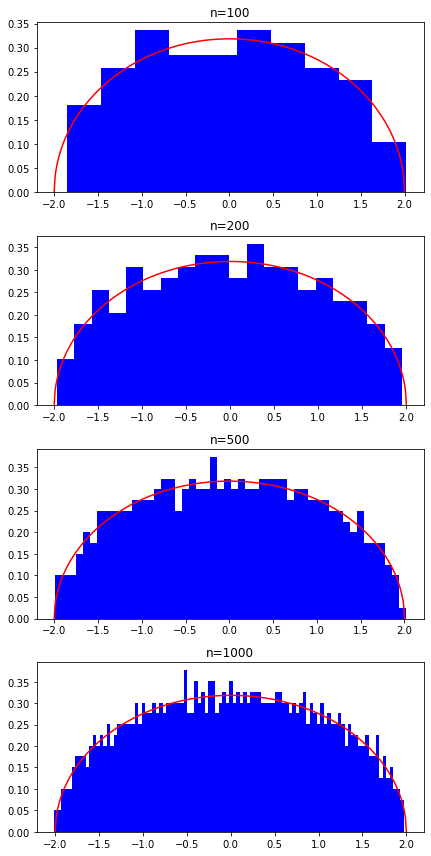

In [15]:
%matplotlib inline
X = [generate_wigner(n) for n in [100, 200, 500, 1000]]#type--np.matrix
eigens = [x_100, x_200, x_500, x_1000]=[get_spectrum(x) for x in X]
num = [100, 200, 500, 1000]
# density curve
den_x = np.arange(-2, 2.01, 0.01)
wigner_density = np.vectorize(wigner_density)

# create the canvas for plotting
fig,ax = plt.subplots(4, 1, figsize=(6, 12))
# subplot
for i in range(len(num)):
    ax[i].hist(eigens[i],bins=int(len(eigens[i])/10), density=True, color='blue')
    ax[i].plot(den_x, wigner_density(den_x), color="red")
    ax[i].set_title('n='+str(num[i]))
    
_ = plt.tight_layout()

#"when n is 500, from the plot we could tell that the semicircular law appears to be a good fit."
n=500

In [16]:
assert ax.data is not None

## 2 Plotting a Mixture of Normals (6 points)
The whole reason that we use plotting software is to visualize the data that we are working with, so let's do that. The file __points.dlm__ is a tab-delimited file (__.dlm__ stands for “delimited”). Such a format is common when writing reasonably small files, and is useful if you expect to use a data set across different programs or platforms. See the documentation for the command `numpy.loadtxt` to see how
to read this file. The file __labels.npy__ is a numpy binary file, representing a `numpy` object. The __.npy__ file format is specific to `numpy`. Many languages (e.g., R and MATLAB) have their own such language-specific file formats for saving variables, workspaces, etc. These formats tend to be more space-efficient, typically at the cost of program-dependence. It is best to avoid such files if you expect to deal with the same data set in several different environments (e.g., you run experiments in MATLAB and do your statistical analysis in R). __.npy__ files are opened using `numpy.load`. 

The observations in my experiment were generated from a distribution that is _approximately_ normal, but not precisely so. Let's explore how well the normal approximation holds.

1. <b>(1 point)</b> Download the .npy and .dlm file, and read the two files into numpy. Please name the result of reading in __labels.npy__ and __points.dlm__ `binaryarray` and `pointarray`, respectively. The former of these should yield a numpy array of $0$s and $1$s, and the latter should yield a $100$-by-$2$ numpy array, in which each row corresponds to a $2$-dimensional point. The $i$-th entry of the array in __labels.npy__ corresponds to the cluster membership label of the $i$-th row of the matrix stored in __points.dlm__.

In [17]:
binaryarray = np.load('labels.npy')
pointarray = np.loadtxt("points.dlm", delimiter='\t')

In [18]:
assert pointarray.shape == (100, 2)
assert binaryarray.shape == (100,)

2. <b>(1 point)</b> Generate a scatter plot of the data. Each data point should appear as an __x__ (often called a _cross_ in data visualization packages), colored according to its cluster membership as given by __points.dlm__. The points with cluster label $0$ should be colored blue, and those with cluster label $1$ should be colored red. Set the x and y axes to both range from 0 to 1. Adjust the size of the point markers to what you believe to be reasonable (i.e., aesthetically pleasing, visible, etc).

(0.0, 1.0)

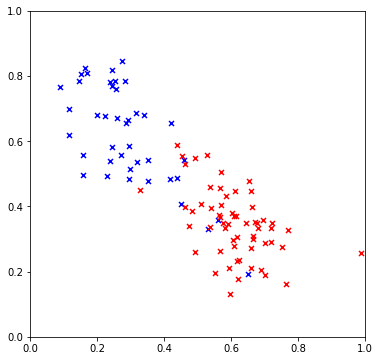

In [19]:
fig = plt.figure(figsize=(6, 6))
ax = plt.gca()
index_0 = np.argwhere(binaryarray == 0)
index_1 = np.argwhere(binaryarray == 1)
ax.scatter(pointarray[index_0, 0], pointarray[index_0, 1], c='blue', marker='x', s=25)
ax.scatter(pointarray[index_1, 0], pointarray[index_1, 1], c='red', marker='x', s=25)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])

In [20]:
assert ax is not None

3. <b>(2 points)</b> Theoretically, the data should approximate a mixture of normals with means and covariance matrices given by 
$$ \mu_0 = (0.2 , 0.7)^T,
        \Sigma_0 = \begin{bmatrix} 0.015 & -0.011 \\
                          -0.011  & 0.018 
                          \end{bmatrix}, $$
$$ \mu_1 = (0.65, 0.3)^T,
        \Sigma_1 = \begin{bmatrix} 0.016 & -0.011 \\
                          -0.011 & 0.016 
                          \end{bmatrix}. $$
For each of these two normal distributions, add two contour lines corresponding to 1 and 2 "standard deviations" of the distribution. We will take the 1-standard deviation contour to be the level set (which is an ellipse) of the normal distribution that encloses probability mass 0.68 of the distribution, and the 2-standard deviation contour to be the level set that encloses probability mass 0.95 of the distribution. The contour lines for cluster $0$ should be colored blue, and the lines for cluster $1$ should be colored red. The contour lines will go off the edge of the 1-by-1 square that we have plotted. Do not worry about that. __Hint:__ use the optional argument `levels` for the `pyplot.contour` function. 

<b>For this question, please use the same fig and ax variables you used in Part 2 of the question. In other words, the result of this part should be the scatterplot and the contours.</b>

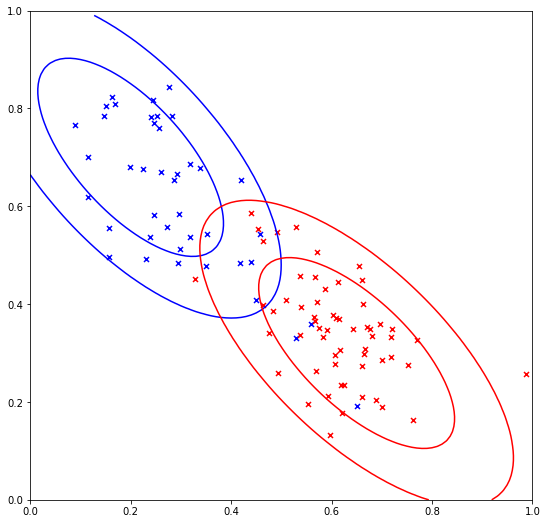

In [21]:
mu0 = np.array([0.2, 0.7])
mu1 = np.array([0.65, 0.3])
Sigma0 = np.array([[0.015, -0.011], [-0.011, 0.018]])
Sigma1 = np.array([[0.016, -0.011], [-0.011, 0.016]])
mvn0 = scipy.stats.multivariate_normal(mu0, Sigma0)
mvn1 = scipy.stats.multivariate_normal(mu1, Sigma1)

x, y = np.mgrid[0:1:0.01, 0:1:0.01]
pos = np.empty(x.shape+(2,))
pos[:, :, 0] = x
pos[:, :, 1] = y

# calculate confidence interval
a = levels = [0.6519, 4.172]

fig = plt.figure(figsize=(9, 9))
ax = plt.gca()
ax.scatter(pointarray[index_0, 0], pointarray[index_0, 1], c='blue', marker='x', s=25)
ax.scatter(pointarray[index_1, 0], pointarray[index_1, 1], c='red', marker='x', s=25)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.contour(x, y, mvn0.pdf(pos), levels=a, colors='blue')
ax.contour(x, y, mvn1.pdf(pos), levels=a, colors='red')
plt.show()

In [4]:
x, y = np.mgrid[0:1:0.01, 0:1:0.01]
pos = np.empty(x.shape+(2,))

(100, 100, 2)

In [22]:
assert ax is not None

4. <b>(2 points)</b> Do the data appear normal? Store the boolean answer to this question in a variable called `normal`. There should be at least one obvious outlier. Add an annotation to the top right of your figure indicating one or more such outlier(s).

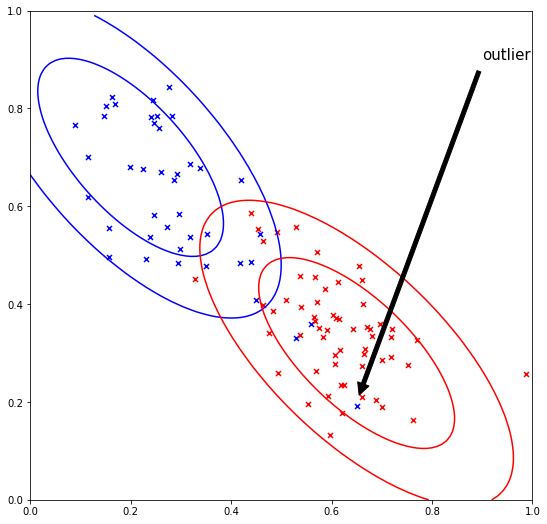

In [23]:
normal = True
fig = plt.figure(figsize=(9, 9))
ax = plt.gca()
ax.scatter(pointarray[index_0, 0], pointarray[index_0, 1], c='blue', marker='x', s=25)
ax.scatter(pointarray[index_1, 0], pointarray[index_1, 1], c='red', marker='x', s=25)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.contour(x, y, mvn0.pdf(pos), levels=a, colors='blue')
ax.contour(x, y, mvn1.pdf(pos), levels=a, colors='red')
# add annotation
ax.annotate("outlier", xy=(0.65, 0.2), xytext=(0.9, 0.9), fontsize=15,
            arrowprops=dict(facecolor="black", shrink=0.02))
plt.show()

In [24]:
assert type(normal) == bool

In [25]:
assert ax.annotate is not None

## 3. Conway's Game of Life (8 points)
Conway's Game of Life (__https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life__) is a classic example of a _cellular automaton_ devised by mathematician John Conway. The game is a classic example of how simple rules can give rise to complex behavior. The game is played on an $m$-by-$n$ board, which we will represent as an $m$-by-$n$ matrix. The game proceeds in steps. At any given time, each cell of the board (i.e., entry of our matrix), is either alive (which we will represent as a $1$) or dead (which we will represent as a $0$).
At each step, the board evolves according to a few simple rules:

- A live cell with fewer than two live neighbors becomes a dead cell.
- A live cell with more than three live neighbors becomes a dead cell.
- A live cell with two or three live neighbors remains alive.
- A dead cell with _exactly_ three live neighbors becomes alive.
- All other dead cells remain dead.

The neighbors of a cell are the 8 cells adjacent to it, i.e., left, right, above, below, upper-left, lower-left, upper-right and lower-right. We will follow the convention that the board is _toroidal_, so that using matrix-like notation (i.e., the cell $(0,0)$ is in the upper-left of the board and the first coordinate specifies a row), the upper neighbor of the cell $(0,0)$ is $(m-1,0)$, the right neighbor of the cell $(m-1,n-1)$ is $(m-1,0)$, etc. That is, the board "wraps around". __Note:__ you are not required to use this matrix-like indexing. It's just what I chose to use to explain the toroidal property.

1. <b>(2 points)</b> Write a function `is_valid_board` that takes an $m$-by-$n$ numpy array (i.e., an __ndarray__) as its only argument and returns a Python Boolean that is __True__ if and only if the argument is a valid representation of a Game of Life board. A valid board is any two-dimensional numpy __ndarray__ of integers with all entries either 0 or 1.

In [26]:
def is_valid_board(array):
    if not type(array) == np.ndarray:
        return False
    # 0. and 1. also make sense
    if not np.all(np.logical_or(array == 0, array == 1)):
        return False
    if not len(array.shape) == 2:
        return False
    return True

In [27]:
assert is_valid_board(np.array([1, 1, 1, 1]).reshape(2, 2))

In [28]:
assert not is_valid_board(123)

In [29]:
assert not is_valid_board([[1, 1], [1, 1]])

2. <b>(3 points)</b> Write a function called `gol_step` that takes an $m$-by-$n$ __numpy__ array as its argument and returns another __numpy__ array of the same size (i.e., also $m$-by-$n$), corresponding to the board at the next step of the game. Your function should perform error checking to ensure that the provided argument is a valid Game of Life board.

In [30]:
def sumneighbor(array, pos):
    m, n = array.shape
    value = 0

    def left(a):
        if a[1] != 0:
            return [a[0], a[1]-1]
        else:
            return [a[0], n-1]

    def right(a):
        if a[1] != (n-1):
            return [a[0], a[1]+1]
        else:
            return [a[0], 0]

    def upper(a):
        if a[0] != 0:
            return [a[0]-1, a[1]]
        else:
            return [m-1, a[1]]

    def lower(a):
        if a[0] != (m-1):
            return [a[0]+1, a[1]]
        else:
            return [0, a[1]]

    value = array[left(pos)[0], left(pos)[1]] + array[right(pos)[0], right(pos)[1]] +\
        array[upper(pos)[0], upper(pos)[1]] + array[lower(pos)[0], lower(pos)[1]] +\
        array[left(upper(pos))[0], left(upper(pos))[1]] +\
        array[right(upper(pos))[0], right(upper(pos))[1]] +\
        array[left(lower(pos))[0], left(lower(pos))[1]] +\
        array[right(lower(pos))[0], right(lower(pos))[1]]
    return value


def gol_step(array):
    if not is_valid_board(array):
        raise TypeError
    # transform float to int(0. & 1.)
    array = array.astype(int)
    [nrow, ncol] = array.shape
    newarray = np.empty((nrow, ncol))
    for i in range(nrow):
        for j in range(ncol):
            if array[i, j] == 1:
                if not (sumneighbor(array, [i, j]) in (2, 3)):
                    newarray[i, j] = 0
                else:
                    newarray[i, j] = 1
            else:
                if sumneighbor(array, [i, j]) == 3:
                    newarray[i, j] = 1
                else:
                    newarray[i, j] = 0

    return newarray

In [31]:
myboard = np.array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]).reshape(4, 4)
myboardans = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]).reshape(4, 4)
assert not sum(sum((gol_step(myboard) - myboardans)**2))

In [32]:
ins = np.array([[1.]])
assert int(gol_step(ins)) == 0


In [33]:
try:
    gol_step(89)

except TypeError:
    pass

else:
    raise AssertionError("The input is not a valid Game of Life Board")

3. <b>(1 point)</b> Write a function called `draw_gol_board` that takes an $m$-by-$n$ __numpy__ array (i.e., an __ndarray__) as its only argument and draws the board as an $m$-by-$n$ set of tiles, colored black or white correspond to whether the corresponding cell is alive or dead, respectively. Your plot should _not_ have any grid lines, nor should it have any axis labels or axis ticks. __Hint:__ see the functions `plt.xticks()` and `plt.yticks()` for changing axis ticks. __Hint:__ you may find the function `plt.get_cmap` to be useful for working with the __matplotlib__ __Colormap__ objects.

In [34]:
def draw_gol_board(array):
    cmap = 'gray_r'
    plt.imshow(array, cmap=plt.get_cmap(cmap))
    plt.xticks([])
    plt.yticks([])

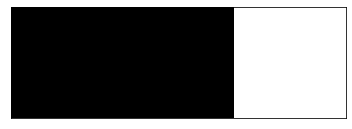

In [35]:
fig = draw_gol_board(np.array([[1, 1, 0]]))
ax = plt.gca()
assert ax.get_xticklines() == []

4. <b>(1 point)</b> Create a 20-by-20 numpy array corresponding to a Game of Life board in which all cells are dead, with the exception that the top-left 5-by-5 section of the board looks like this: 
<img src="./glider.png">
Plot this 20-by-20 board using draw_gol_board.

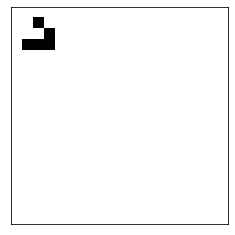

In [36]:
board20 = np.zeros((20, 20))
topleft = np.array(
    [[0, 0, 0, 0, 0],
     [0, 0, 1, 0, 0],
     [0, 0, 0, 1, 0],
     [0, 1, 1, 1, 0],
     [0, 0, 0, 0, 0]])
board20[0:5, 0:5] = topleft
draw_gol_board(board20)

In [37]:
# This cell will test if you did Problem 3 Part 4 correctly.

5. <b>(1 point)</b> Generate a plot with 5 subplots, arranged in a 1-by-5 grid (i.e., horizontal array of 5 subplots), showing the first five steps of the Game of Life when started with the board you just created, with the steps ordered from left to right. The first plot should be the starting board just described, so that the first plot is the state of the board before we execute any steps. The figure in the 5-by-5 sub-board above is called a _glider_, and it is interesting in that, as you can see from your plot, it seems to move along the board as you run the game.

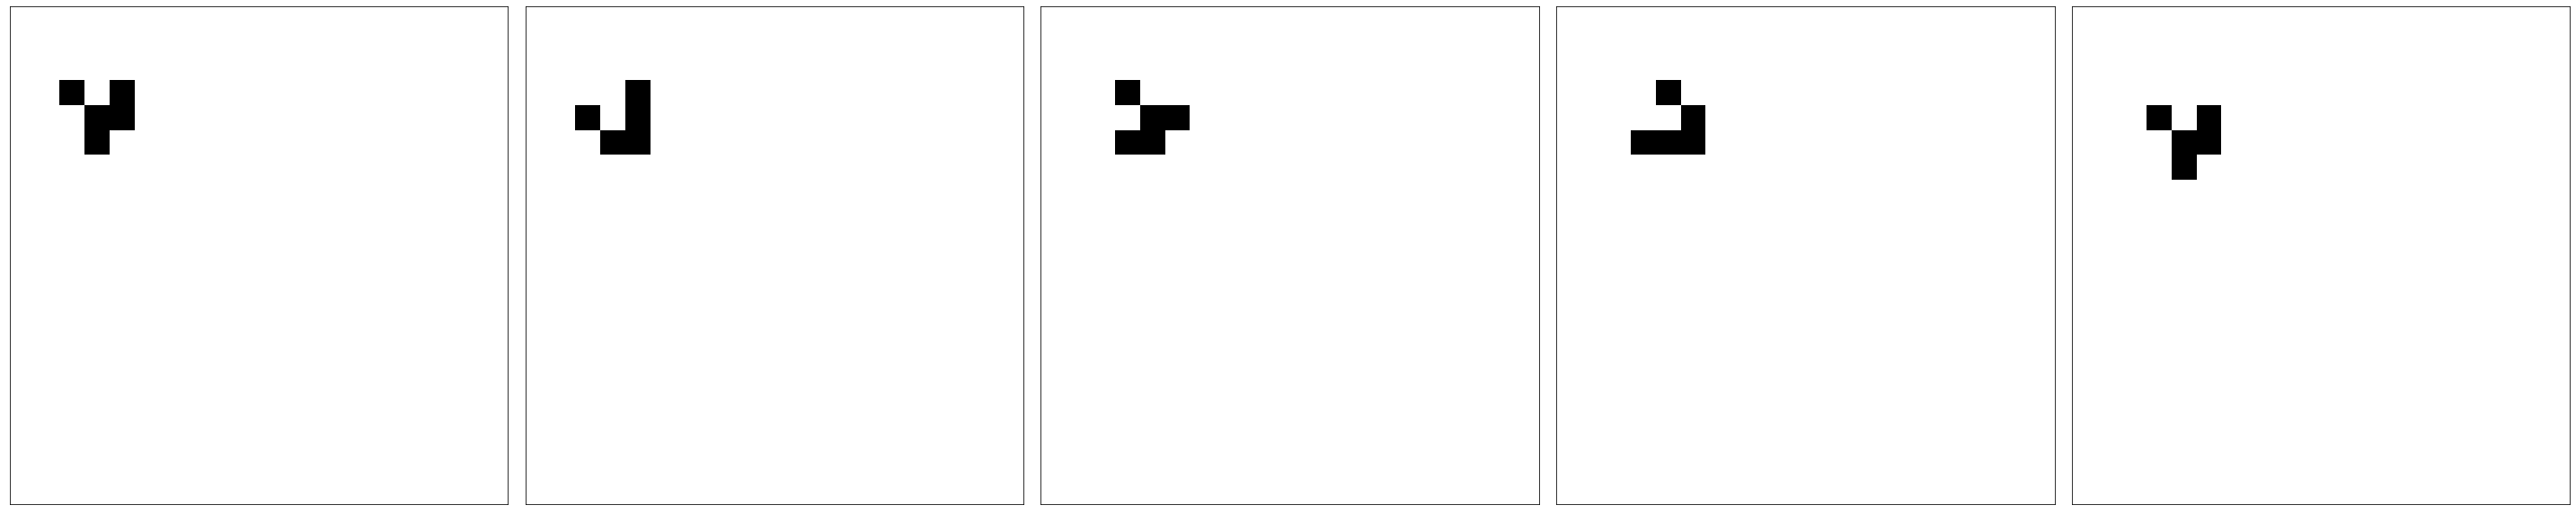

In [42]:
%matplotlib inline
plt.figure(figsize=(40, 8))
for i in range(5):
    plt.subplot(int('1' + '5' + str(i + 1)))
    draw_gol_board(board20)
    board20 = gol_step(board20)
_ = plt.tight_layout()

In [43]:
# This will test if you did Problem 3 Part 5 correctly.

__Optional additional exercise:__ create a function that takes two arguments, a Game of Life board and a number of steps, and generates an animation of the game as it runs for the given number of steps.

In [ ]:
# Please leave this cell as the last cell in the notebook.